**Logistic regression** is widely used in binary classification problems like predicting whether a client will subscribe to a service. The target variable $ Y_i $ can either be 0 (no subscription) or 1 (subscription). We aim to model the probability of subscription $ P(Y_i = 1 | X_i) $, given the client's features $ X_i = (x_{i1}, x_{i2}, \dots, x_{ik}) $.

Since linear regression is not appropriate for predicting probabilities (as they are constrained between 0 and 1), logistic regression uses the **logit function** to transform the linear relationship:

$$
\text{logit}(p_i) = \log\left(\frac{p_i}{1 - p_i}\right) = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_k x_{ik}
$$

This transformation ensures that the predicted probabilities are always between 0 and 1. The inverse of the logit function is the **logistic function**:

$$
p_i = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_{i1} + \dots + \beta_k x_{ik})}}
$$

The logistic function produces an S-shaped curve that approaches 0 as the linear predictor moves to negative infinity, and approaches 1 as it moves to positive infinity.

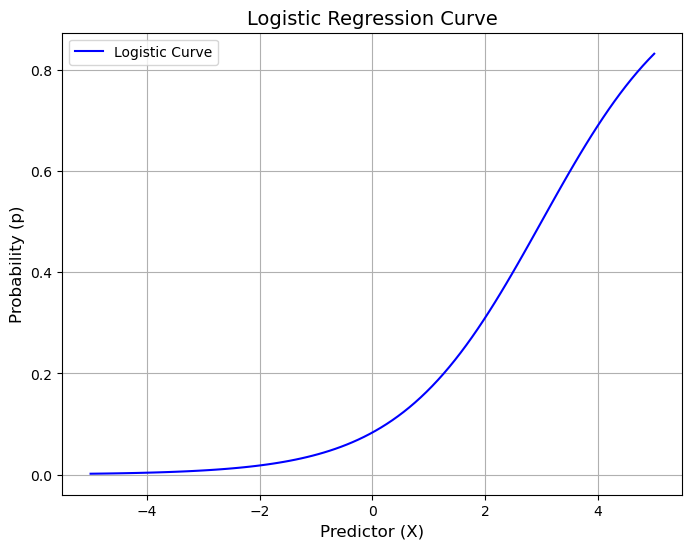

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters for logistic regression
beta_0 = -2.4
beta_1 = 0.8

# Simulate data for predictor
x = np.linspace(-5, 5, 100)
logit = beta_0 + beta_1 * x
probability = 1 / (1 + np.exp(-logit))

# Plotting the logistic curve
plt.figure(figsize=(8, 6))
plt.plot(x, probability, label='Logistic Curve', color='b')
plt.title('Logistic Regression Curve', fontsize=14)
plt.xlabel('Predictor (X)', fontsize=12)
plt.ylabel('Probability (p)', fontsize=12)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

Logistic regression estimates parameters by **maximum likelihood estimation (MLE)**. The goal is to find the parameters $\boldsymbol{\beta} = (\beta_0, \beta_1, \dots, \beta_k)$ that maximize the likelihood of observing the data.

The **likelihood function** for each observation $ i $ is:

$$
P(Y_i = 1 | X_i) = p_i, \quad P(Y_i = 0 | X_i) = 1 - p_i
$$

For a set of $ n $ independent observations, the likelihood is:

$$
L(\boldsymbol{\beta}) = \prod_{i=1}^{n} p_i^{y_i} (1 - p_i)^{1 - y_i}
$$

The **log-likelihood** function is:

$$
\ell(\boldsymbol{\beta}) = \sum_{i=1}^{n} \left[ y_i \log(p_i) + (1 - y_i)\log(1 - p_i) \right]
$$

Substituting $ p_i = \frac{1}{1 + e^{-z_i}} $ where $ z_i = X_i^\top \boldsymbol{\beta} $, we have:

$$
\ell(\boldsymbol{\beta}) = \sum_{i=1}^{n} \left[ y_i z_i - \log(1 + e^{z_i}) \right]
$$

To find the MLE, we maximize this log-likelihood function with respect to $ \boldsymbol{\beta} $, typically using **numerical optimization methods** like Newton-Raphson.

The coefficients $ \beta_j $ in logistic regression tell us how the log-odds of success change with respect to each predictor $ X_j $. The odds ratio, obtained by exponentiating the coefficient, provides a more interpretable measure:

$$
\text{Odds Ratio} = e^{\beta_j}
$$

For example:
- If $ e^{\beta_j} = 1.2 $, the odds of success increase by 20% for a one-unit increase in $ X_j $.
- If $ e^{\beta_j} = 0.8 $, the odds decrease by 20%.

For categorical variables, the coefficient represents the difference in log-odds relative to the reference category.

Additionally, the **marginal effect** tells us how the predicted probability $ p $ changes with respect to a continuous predictor $ X_j $:

$$
\frac{\partial p}{\partial X_j} = \beta_j p(1 - p)
$$

This shows how sensitive the probability is to changes in $ X_j $.

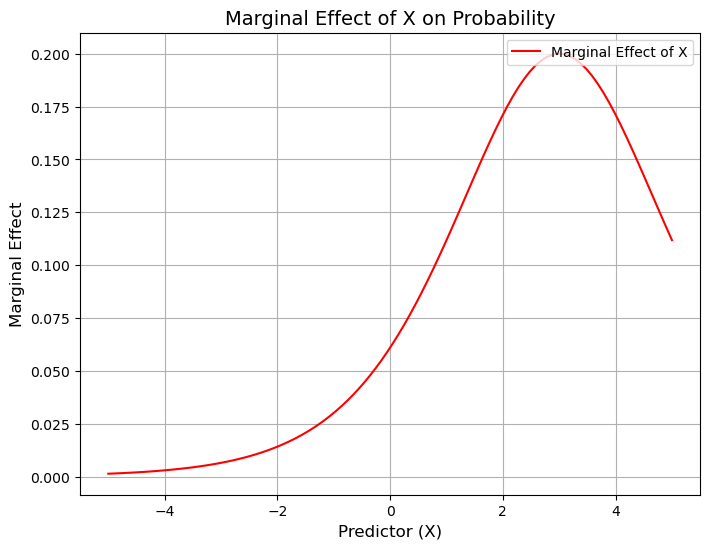

In [3]:
# Simulate data for a continuous predictor
X = np.linspace(-5, 5, 100)

# Logistic regression coefficients
beta_0 = -2.4
beta_1 = 0.8

# Predicted probability (logistic function)
logit = beta_0 + beta_1 * X
probability = 1 / (1 + np.exp(-logit))

# Calculate the marginal effect
marginal_effect = beta_1 * probability * (1 - probability)

# Plotting the marginal effect
plt.figure(figsize=(8, 6))
plt.plot(X, marginal_effect, label='Marginal Effect of X', color='r')
plt.title('Marginal Effect of X on Probability', fontsize=14)
plt.xlabel('Predictor (X)', fontsize=12)
plt.ylabel('Marginal Effect', fontsize=12)
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

Logistic regression has several key assumptions:

1. **Correct Functional Form**: There should be a linear relationship between the predictors and the log-odds of the outcome. If the effect is nonlinear, transformations like polynomials or splines should be considered.
2. **Independence of Observations**: Observations must be independent. Temporal or repeated contacts may require using clustered standard errors or hierarchical models.
3. **No Perfect Multicollinearity**: Predictors should not be exact linear combinations of others. Highly correlated predictors can make the model unstable. Use the Variance Inflation Factor (VIF) to check for multicollinearity.
4. **Sufficient Sample Size**: A rule of thumb is at least 10 events per predictor variable (EPV ≥ 10) to ensure stable coefficient estimates.
5. **Absence of Complete Separation**: If a predictor perfectly predicts the outcome, the model cannot converge. Regularization techniques may be needed to address this.
6. **Homogeneity of Variance**: Unlike linear regression, logistic regression does not assume constant variance of errors.
7. **Additivity of Effects**: Effects should combine additively. Interactions between variables should be included explicitly.

Evaluating logistic regression models involves checking their goodness of fit, including metrics like the **log-likelihood**, **deviance**, and **pseudo-R^2**. A higher log-likelihood and smaller deviance indicate a better fit.

The **Receiver Operating Characteristic (ROC)** curve is another crucial diagnostic tool. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for different threshold values. The **Area Under the Curve (AUC)** is a summary measure of model performance, where values closer to 1 represent better model discrimination.

Additionally, a **Calibration Plot** compares the predicted probabilities with actual observed outcomes. If the model is well-calibrated, the predicted probabilities should match the observed frequencies.

In this section, we will generate and evaluate the **ROC curve** and calculate the **AUC** for our logistic regression model.

Let's first generate some data and fit a logistic regression model:

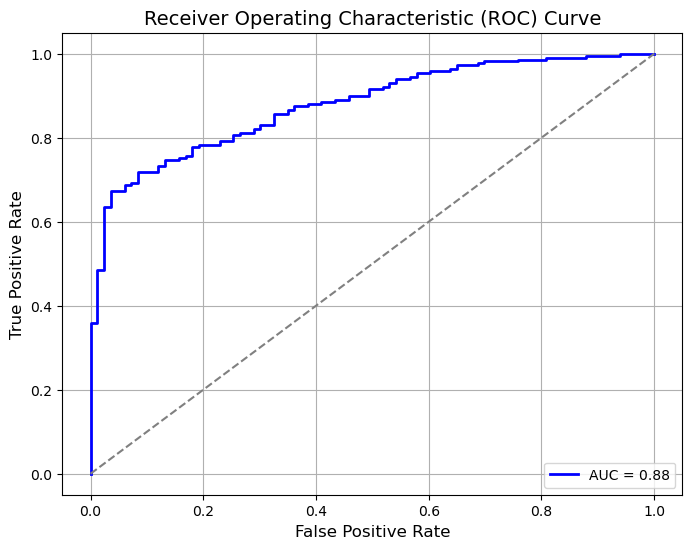

In [4]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate some synthetic data
np.random.seed(42)
X = np.random.rand(1000, 3)  # 3 predictors
y = (X[:, 0] + X[:, 1] * 2 + X[:, 2] * 3 + np.random.randn(1000) > 2).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Visual diagnostics help interpret the logistic regression model and connect the abstract concepts of log-odds and coefficients to real-world outcomes.

1. **Logistic Curve**: Shows how predicted probabilities change with a continuous predictor, holding other variables constant. This curve helps visualize the diminishing effect of predictors at the extremes.
2. **Marginal Effect Plot**: Shows how the probability changes with one predictor while keeping others fixed. This plot helps interpret the impact of individual variables in the model.
3. **Probability Distribution by Predictor Category**: Bar plots that show the effect of categorical predictors on the probability of success.
4. **Calibration Plot**: Compares the predicted probabilities to the actual observed probabilities to assess the model's calibration.

The logistic curve represents the S-shaped relationship between a predictor variable and the probability of success. It shows how small changes in the predictor near the center of the curve have a large effect on probability, while changes at the extremes have diminishing returns.

We will now plot the logistic curve for a single predictor variable to see how predicted probabilities change.

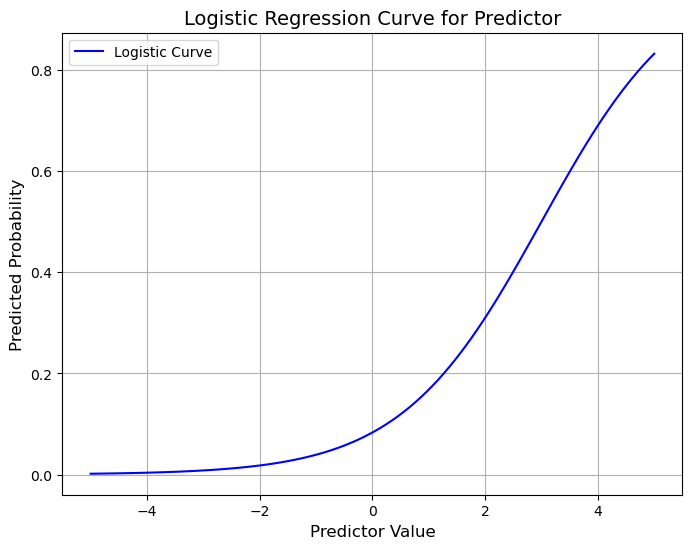

In [5]:
# Let's visualize the logistic curve for a single predictor (e.g., previous contact)
X_predictor = np.linspace(-5, 5, 100)  # Simulate predictor values

# Predicted probabilities based on the logistic function
logit = beta_0 + beta_1 * X_predictor
probability = 1 / (1 + np.exp(-logit))

# Plotting the logistic curve
plt.figure(figsize=(8, 6))
plt.plot(X_predictor, probability, label='Logistic Curve', color='b')
plt.title('Logistic Regression Curve for Predictor', fontsize=14)
plt.xlabel('Predictor Value', fontsize=12)
plt.ylabel('Predicted Probability', fontsize=12)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

Marginal effects show how the probability changes as one predictor varies, while holding all other predictors constant. This plot helps interpret the effect of each individual predictor in the context of the full model.

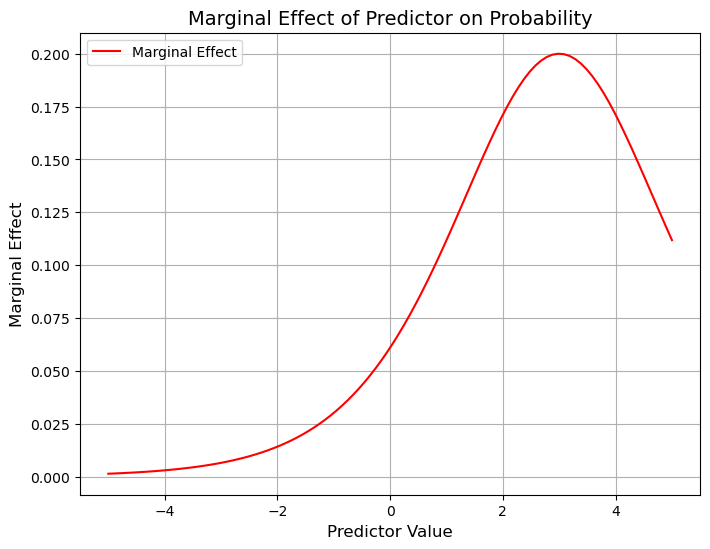

In [6]:
# Calculate marginal effects based on the logistic regression
marginal_effect = beta_1 * probability * (1 - probability)

# Plotting the marginal effect of the predictor
plt.figure(figsize=(8, 6))
plt.plot(X_predictor, marginal_effect, label='Marginal Effect', color='r')
plt.title('Marginal Effect of Predictor on Probability', fontsize=14)
plt.xlabel('Predictor Value', fontsize=12)
plt.ylabel('Marginal Effect', fontsize=12)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

For categorical variables, we can visualize how the probability of success differs across categories. Bar plots are useful for this, as they provide a clear comparison of response rates for each category.

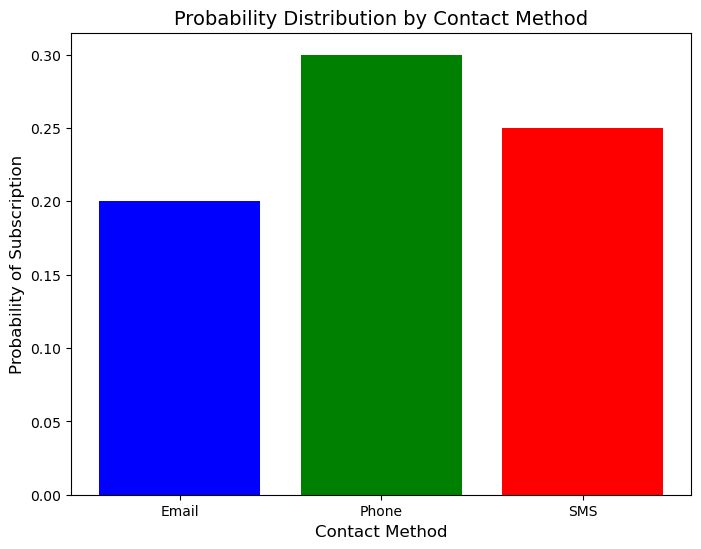

In [8]:
# For simplicity, let's simulate data for categorical variables
categories = ['Email', 'Phone', 'SMS']
probabilities = [0.2, 0.3, 0.25]

# Plotting the probabilities for each category
plt.figure(figsize=(8, 6))
plt.bar(categories, probabilities, color=['blue', 'green', 'red'])
plt.title('Probability Distribution by Contact Method', fontsize=14)
plt.xlabel('Contact Method', fontsize=12)
plt.ylabel('Probability of Subscription', fontsize=12)
plt.grid(False)
plt.show()

A calibration plot compares the predicted probabilities with the observed frequencies of success. If the model is well-calibrated, the predicted probabilities should match the actual outcomes.

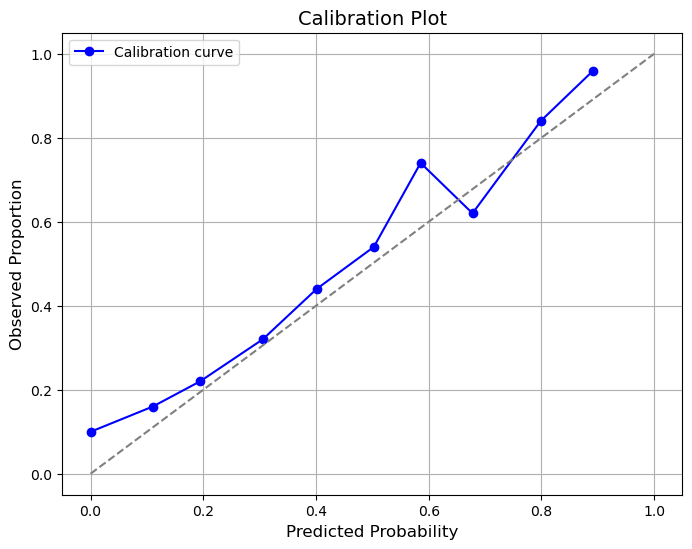

In [10]:
# Let's simulate predicted probabilities and observed outcomes for calibration
predicted_probabilities = np.random.rand(500)  # Simulating predicted probabilities
# Create y_prob with the same shape as predicted_probabilities
y_prob = predicted_probabilities  # Using predicted_probabilities as probabilities for simplicity
# Or alternatively: y_prob = np.random.rand(500)  # Create random probabilities of same length

observed_outcomes = np.random.binomial(1, y_prob, 500)  # Simulating actual outcomes

# Group the predicted probabilities into deciles
deciles = np.percentile(predicted_probabilities, np.arange(0, 110, 10))
observed_probs = [np.mean(observed_outcomes[(predicted_probabilities >= deciles[i]) & 
                                           (predicted_probabilities < deciles[i+1])]) 
                  for i in range(10)]

# Plotting the calibration plot
plt.figure(figsize=(8, 6))
plt.plot(deciles[:-1], observed_probs, marker='o', label='Calibration curve', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # 45-degree line
plt.title('Calibration Plot', fontsize=14)
plt.xlabel('Predicted Probability', fontsize=12)
plt.ylabel('Observed Proportion', fontsize=12)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

Partial dependence plots (PDPs) show how the predicted response varies as one feature changes, while keeping all other features constant. This can be particularly useful for understanding nonlinear relationships in the data.

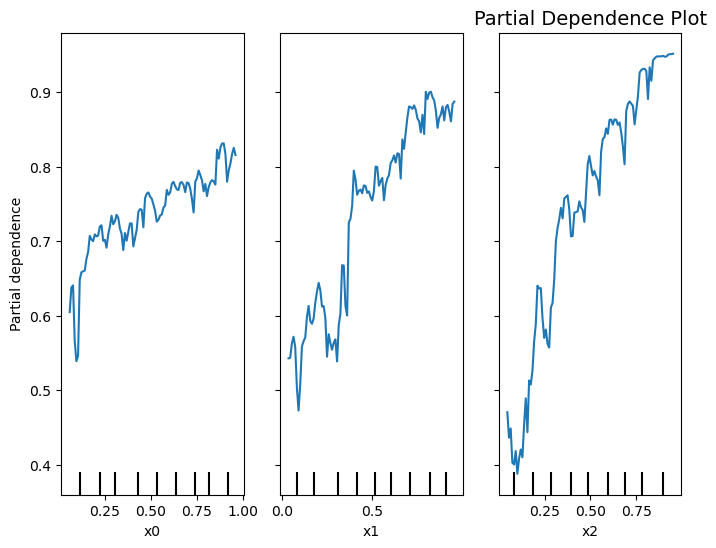

In [15]:
# For simplicity, let's simulate a partial dependence plot for a feature
from sklearn.inspection import PartialDependenceDisplay  # Updated import

# Simulating a model
from sklearn.ensemble import RandomForestClassifier

# Fit a random forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Plot partial dependence using the updated method
fig, ax = plt.subplots(figsize=(8, 6))
# Use PartialDependenceDisplay.from_estimator instead of plot_partial_dependence
PartialDependenceDisplay.from_estimator(rf_model, X_train, features=[0, 1, 2], ax=ax)
plt.title('Partial Dependence Plot', fontsize=14)
plt.show()